In [1]:
import sklearn.datasets
import sklearn.decomposition
import seaborn
import sklearn.preprocessing
import pandas
import numpy

In [2]:
data = sklearn.datasets.load_breast_cancer(as_frame=True)

In [3]:
df = pandas.DataFrame().reindex_like(data["data"])
df.iloc[:,:] = sklearn.preprocessing.StandardScaler().fit_transform(data["data"])

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [5]:
pca = sklearn.decomposition.PCA(n_components=2)
trans = pca.fit_transform(df)

In [6]:
df.columns = ["feat_%s" % c for c in df]

In [7]:
df["feat_umap_0"] = trans[:, 0]
df["feat_umap_1"] = trans[:, 1]
df["meta_target"] = data["target"]

In [8]:
df = df.reset_index()
for col in df:
    if(df[col].dtype == numpy.int64):
        df[col] = df[col].astype(numpy.int32)

df.to_feather("./demo.feather", compression="uncompressed")

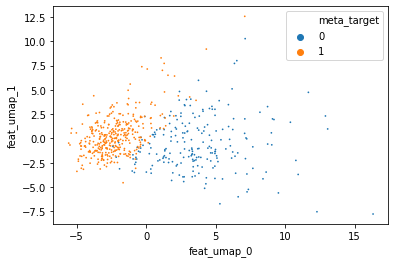

In [9]:
seaborn.scatterplot(data=df, x="feat_umap_0", y="feat_umap_1", linewidth=0, s=3, hue="meta_target")

In [64]:
pop1 = df[df["feat_umap_0"] < 0].copy()
pop2 = df[df["feat_umap_1"] > 2].copy()
pop1["meta_pop"] = 1
pop2["meta_pop"] = 2
pops = pandas.concat([pop1, pop2])

In [71]:
import sklearn.ensemble

In [80]:
rf = sklearn.ensemble.RandomForestClassifier()
rf.fit(pops.drop(columns=df.filter(regex="(target|umap)").columns), pops["meta_target"])

RandomForestClassifier()

In [81]:
sidx = numpy.argsort(rf.feature_importances_)[::-1]
pops.drop(columns="meta_target").columns[sidx]

Index(['feat_worst concave points', 'feat_worst perimeter',
       'feat_worst compactness', 'feat_mean concave points', 'feat_worst area',
       'feat_worst radius', 'feat_worst concavity', 'feat_mean concavity',
       'index', 'feat_mean radius', 'feat_worst texture',
       'feat_worst symmetry', 'feat_worst smoothness', 'feat_area error',
       'feat_mean compactness', 'feat_mean texture',
       'feat_worst fractal dimension', 'feat_mean area', 'feat_mean perimeter',
       'feat_mean smoothness', 'feat_radius error', 'feat_perimeter error',
       'feat_mean symmetry', 'feat_smoothness error',
       'feat_fractal dimension error', 'feat_texture error',
       'feat_symmetry error', 'feat_mean fractal dimension',
       'feat_compactness error', 'feat_concavity error',
       'feat_concave points error', 'feat_umap_0'],
      dtype='object')